<class 'numpy.ndarray'> (640, 480, 3)
img_id 00142 label armchair, id 140
[  0 140]


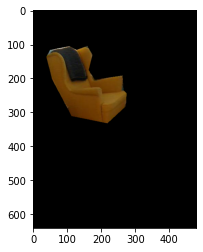

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00140 label armchair, id 140
[  0 140]


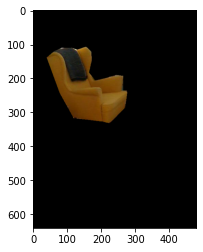

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00088 label armchair, id 140
img_id 00088 label plant, id 87
[  0  87 140]


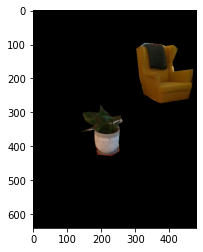

<class 'numpy.ndarray'> (640, 480, 3)
[0]


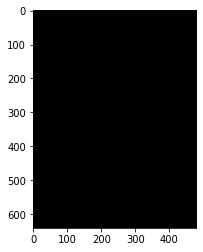

<class 'numpy.ndarray'> (640, 480, 3)
[0]


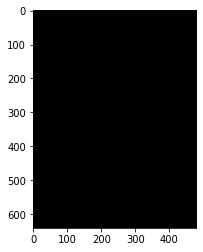

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00090 label plant, id 87
[ 0 87]


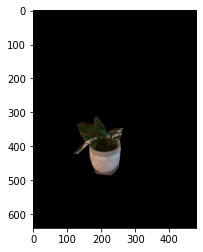

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00103 label hamper, id 103
[  0 103]


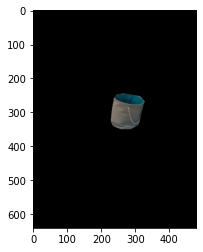

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00099 label hamper, id 103
[  0 103]


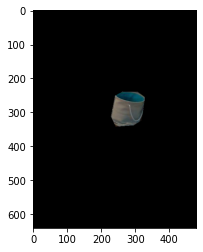

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00096 label hamper, id 103
[  0 103]


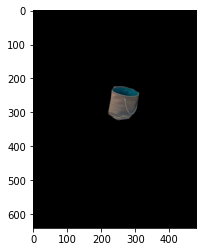

<class 'numpy.ndarray'> (640, 480, 3)
img_id 00087 label plant, id 87
[ 0 87]


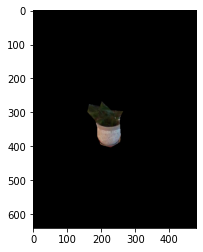

In [26]:
# convert labelme annots folder to seg

import os
import json
import labelme
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import defaultdict

root_dir = '/home/locobotm/0512_data/reexplore_final/baseline_explore'
# root_dir = '/home/locobotm/0512_data/explore_data_0512_validation_set/default/0/'
# root_dir = '/home/locobotm/Photos-001/'
annots = os.path.join(root_dir, 'annots')
out_dir = os.path.join(root_dir, 'seg')
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

id_to_label = {
    87: 'plant',
#     97: 'jacket',
    103: 'hamper',
#     106: 'sidetable',
    140: 'armchair',
}

    
labels = defaultdict(int)
def get_label_id(label):
    for k, v in id_to_label.items():
        if v == label:
            return k
    return None
    
for x in os.listdir(annots):
    with open(os.path.join(annots, x), 'rb') as f:
        dat = json.load(f)
    
    img_id = x.split('.')[0]
    # print(dat)
#     print(dat['imageData'])
    png = labelme.utils.img_b64_to_arr(dat['imageData'])
    print(type(png), png.shape)
    all_masks = np.zeros((dat['imageHeight'], dat['imageWidth'])).astype(np.uint8)
    
    for shapes in dat['shapes']:
        label = shapes['label']
        label_id = get_label_id(label)
        if label_id:
            mask = labelme.utils.shape_to_mask(png.shape, shapes['points'])
            print(f'img_id {img_id} label {label}, id {label_id}')
            all_masks[mask == True] = label_id
        # print(mask.dtype, all_masks.dtype, mask.shape, all_masks.shape)
        # mask[mask == False] = 0
        # all_masks = np.bitwise_or(all_masks, mask)

    print(np.unique(all_masks))
    plt.imshow(cv2.bitwise_or(png, png, mask=all_masks))
    plt.show()
    
    out_f = os.path.join(out_dir, f'{img_id}.npy')
    np.save(out_f, all_masks)
#     print(dat)

armchair = 142, 140, 88
plant = 88, 87, 90
hamper = 103, 99, 96